<a href="https://colab.research.google.com/github/isra-bWk4/upsrj-machine-learning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación Binaria con Regresión Logística y Pipeline en Scikit-Learn

## Introducción
En este notebook se desarrolla un flujo completo de aprendizaje automático utilizando **Scikit-Learn**.  
El objetivo es entrenar un modelo de **regresión logística** sobre un dataset sintético de clasificación con dos características informativas.  



En esta primera parte importamos todas las librerías necesarias:
- numpy y matplotlib para manejo de datos y visualización.
- funciones de scikit-learn para generar un dataset sintético, dividirlo en entrenamiento/prueba, escalar los datos, entrenar un modelo de regresión logística y evaluar su desempeño con métricas.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



Generamos un dataset sintético de clasificación:
- 500 muestras con 2 características informativas.
- No se incluyen características redundantes.
- Cada clase se agrupa en un solo clúster.
- Se fija random_state=42 para asegurar reproducibilidad.
Después mostramos las características (X) y las etiquetas (y).

In [63]:
# 1. tenemos una base de datos con 500 muestras
# 2. tenemos dos features
# 3. no hay features redundantes
# 4. numero de features informativos
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)
print(X)
print(y)

[[ 1.00845498e+00 -1.04700975e+00]
 [ 3.26021382e-01  5.02540973e-01]
 [ 1.02420498e+00 -1.79714286e+00]
 [ 1.21880067e-01  1.05937142e+00]
 [ 3.90997326e-02  3.82369370e-01]
 [ 1.26221796e+00 -7.60726298e-01]
 [ 7.51010599e-01  8.79395978e-01]
 [-7.49552409e-01 -1.31748509e-01]
 [ 3.97777110e-01  6.94304161e-01]
 [ 1.60117355e+00  1.31994147e+00]
 [ 2.65997363e+00 -2.92346297e+00]
 [ 1.39309699e+00 -2.61327073e+00]
 [ 3.25885001e-01 -1.52748814e+00]
 [ 5.54900000e-01  6.62973369e-01]
 [ 1.36121142e-01  1.15068994e+00]
 [ 7.92352807e-01  8.42255922e-01]
 [ 9.46116447e-01  9.05699594e-01]
 [ 1.05575841e-01 -4.29081227e-01]
 [-5.38715030e-04 -1.40426119e+00]
 [ 2.28144543e+00 -1.37667072e+00]
 [ 1.78152502e+00 -1.37344458e+00]
 [ 1.73498800e+00  1.49257599e+00]
 [ 1.49176434e+00 -1.94288103e+00]
 [ 1.09767386e+00  1.07962466e+00]
 [-6.55458394e-01 -9.19380551e-02]
 [-1.31469894e+00 -3.74656287e-01]
 [ 3.05164386e+00  2.25545315e+00]
 [ 2.86514241e+00 -1.49525943e+00]
 [ 1.87384662e+00 -3

En esta parte dividimos el dataset en dos subconjuntos:
- Conjunto de entrenamiento (X_train, y_train) para entrenar el modelo.
- Conjunto de prueba (X_test, y_test) para evaluar el modelo.
Usamos un 70% de los datos para entrenamiento y un 30% para prueba.

In [64]:
# Dividimos datos para entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)
print(X_train)
print(X_test)


[[ 1.26221796 -0.7607263 ]
 [ 0.07936047  0.14227533]
 [ 0.93830337  0.8657095 ]
 [ 0.94611645  0.90569959]
 [ 1.59639415 -2.1477264 ]
 [-0.55186544  0.0445142 ]
 [ 0.12188007  1.05937142]
 [ 0.72366431 -0.09472272]
 [ 0.96091123 -1.23346074]
 [ 1.46668332  1.38715656]
 [ 0.31114247  0.58998764]
 [ 0.64776607  0.75362488]
 [ 0.59599436  0.73358369]
 [ 0.5137828   0.58766264]
 [ 0.43208132 -0.93884228]
 [ 1.313692   -0.88171605]
 [ 3.05164386  2.25545315]
 [-0.74955241 -0.13174851]
 [ 1.38473827  1.17135933]
 [-0.7385946  -0.09387867]
 [ 1.03346774  1.04987505]
 [ 2.83974868  2.23683075]
 [ 1.33236776 -1.33050678]
 [ 0.695858    0.82358346]
 [ 0.08905981  0.43539717]
 [ 1.02349583  0.9690128 ]
 [ 0.41804685  0.5920414 ]
 [ 0.91616965 -1.38496952]
 [ 2.6203283   2.07582499]
 [ 2.34524196 -3.2190333 ]
 [ 0.58021635 -0.96362306]
 [-0.18820613  1.34201466]
 [ 0.2304976   0.27857988]
 [ 0.80948092 -0.02394414]
 [-0.37252418  0.10243277]
 [ 1.21322436 -0.56108525]
 [ 0.12985886  0.44106538]
 

En esta parte aplicamos preprocesamiento:
- Usamos StandardScaler para normalizar las características.
- Esto asegura que todas las variables tengan media 0 y desviación estándar 1.
- Es importante para que el modelo no se sesgue por escalas diferentes.

In [65]:
# Escalamos datos para procesar (preprocesamiento)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 2.78796077e-01 -5.66313563e-01]
 [-1.12130253e+00  8.27359395e-02]
 [-1.04607982e-01  6.02717942e-01]
 [-9.53599754e-02  6.31461576e-01]
 [ 6.74346357e-01 -1.56324613e+00]
 [-1.86845806e+00  1.24682811e-02]
 [-1.07097387e+00  7.41916108e-01]
 [-3.58667198e-01 -8.76108913e-02]
 [-7.78480106e-02 -9.06100391e-01]
 [ 5.20813108e-01  9.77517875e-01]
 [-8.46951934e-01  4.04537634e-01]
 [-4.48504758e-01  5.22155000e-01]
 [-5.09784746e-01  5.07750011e-01]
 [-6.07095104e-01  4.02866498e-01]
 [-7.03801714e-01 -6.94337794e-01]
 [ 3.39723726e-01 -6.53277239e-01]
 [ 2.39686416e+00  1.60162248e+00]
 [-2.10245180e+00 -1.14223877e-01]
 [ 4.23818206e-01  8.22409540e-01]
 [-2.08948150e+00 -8.70042166e-02]
 [ 8.03407372e-03  7.35090411e-01]
 [ 2.14605276e+00  1.58823728e+00]
 [ 3.61829437e-01 -9.75854067e-01]
 [-3.91580356e-01  5.72439048e-01]
 [-1.10982183e+00  2.93422808e-01]
 [-3.76925546e-03  6.76969141e-01]
 [-7.20413720e-01  4.06013814e-01]
 [-1.30806733e-01 -1.01500019e+00]
 [ 1.88633410e+00  1

En esta parte definimos y entrenamos el modelo de regresión logística.
El modelo aprende a separar las clases usando los datos de entrenamiento ya escalados.

In [66]:
# Generamos nuestro modelo y lo alimentamos
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Aquí generamos las predicciones del modelo sobre el conjunto de prueba.
Esto nos permite ver cómo clasifica nuevas muestras que no ha visto antes.

In [67]:
# Generamos prediccion
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1
 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1
 0 0]


En esta parte evaluamos el desempeño del modelo:
- Accuracy: porcentaje de aciertos.
- Matriz de confusión: muestra aciertos y errores por clase.
- Reporte de clasificación: incluye precisión, recall y F1-score.

In [68]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Classification report:", classification_report(y_test, y_pred))

Accuracy: 0.8466666666666667
Confusion matrix: [[66  9]
 [14 61]]
Classification report:               precision    recall  f1-score   support

           0       0.82      0.88      0.85        75
           1       0.87      0.81      0.84        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



Definimos una función para graficar la frontera de decisión del modelo.
Esto nos permite visualizar cómo el modelo separa las dos clases en el espacio de características.

In [69]:
def plot_decision_boundary(X, y, model):
  x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
  y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
  xx, yy = np.meshgrid(
      np.linspace(x_min, x_max, 200),
      np.linspace(y_min, y_max, 200)
  )
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.3)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", s=50)
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.title("Logistic Regression Decision Boundary")
  plt.show()

Aquí llamamos a la función para graficar la frontera de decisión usando el modelo entrenado.

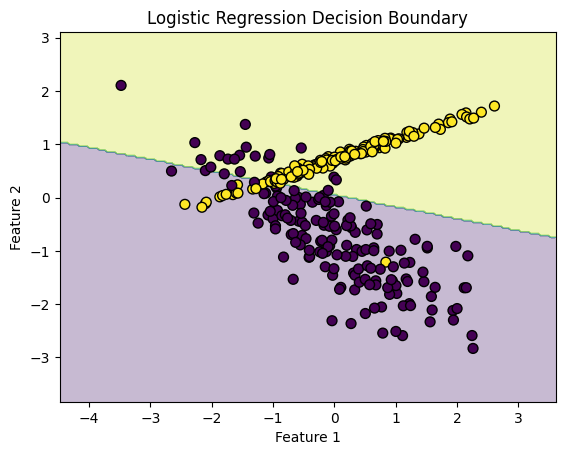

In [70]:
plot_decision_boundary(X_train, y_train, model)

Importamos las librerías necesarias para crear un Pipeline.
El Pipeline nos permite encadenar pasos de preprocesamiento y modelado en un solo flujo.

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Definimos y entrenamos un Pipeline que incluye:
1. Escalado de datos con StandardScaler.
2. Clasificación con LogisticRegression.
Luego generamos predicciones y graficamos la frontera de decisión usando el Pipeline.

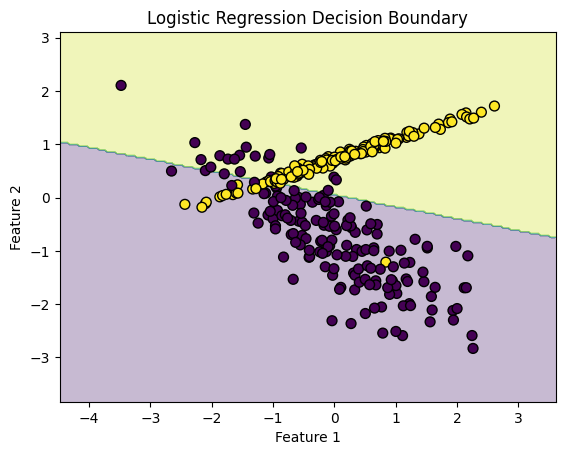

In [72]:
# Definimos pipeline: escalado + modelo
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression())
])

# Entrenamos pipeline
pipeline.fit(X_train, y_train)

# Predicciones con pipeline
y_pred_pipe = pipeline.predict(X_test)


# Graficamos frontera de decisión usando pipeline
plot_decision_boundary(X_train, y_train, pipeline)